In [17]:
import torch
import torch.nn as nn
from torch.optim import SGD
from numpy import *
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
plt.style.use(['science','notebook','grid'])
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

In [18]:
vals = load(r"C:\Users\Nunocastanheira\Desktop\boooks\research\Gelb!\Code\SESSA-Project-main\output\Master.npy")

In [19]:
energy = torch.tensor(vals[0,0,:,0],dtype=torch.float)
thickness = torch.tensor(array([range(1,25)]).transpose(),dtype=torch.float)
counts = torch.tensor(vals[0,:,:,1],dtype=torch.float)
test = torch.tensor(vals[0,:,:,1],dtype=torch.float)*10**7
print(shape(energy))
print(shape(test))
print(shape(thickness))
print(energy)
print(test)

torch.Size([2048])
torch.Size([24, 2048])
torch.Size([24, 1])
tensor([ 500.0000,  500.4880,  500.9770,  ..., 1498.5400, 1499.0200,
        1499.5100])
tensor([[2.9532, 2.9536, 2.9540,  ..., 0.0036, 0.0036, 0.0036],
        [2.9545, 2.9549, 2.9553,  ..., 0.0037, 0.0037, 0.0037],
        [2.9357, 2.9361, 2.9365,  ..., 0.0038, 0.0038, 0.0038],
        ...,
        [2.9114, 2.9118, 2.9122,  ..., 0.0047, 0.0047, 0.0046],
        [2.8748, 2.8752, 2.8755,  ..., 0.0047, 0.0047, 0.0047],
        [2.9147, 2.9151, 2.9154,  ..., 0.0048, 0.0047, 0.0047]])


In [20]:
def train_model(x,y,f, n_epochs=500):
    opt = SGD(f.parameters(), lr=10**-4)
    L = nn.MSELoss()

    # Train model
    losses = []
    for _ in tqdm(range(n_epochs)):
        opt.zero_grad() 
        loss_value = L(f(x), y)
        loss_value.backward() 
        opt.step() 
        losses.append(loss_value.item())
    return f, losses

N = 2**11
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(1,N)
        self.Matrix2 = nn.Linear(N,N)
        self.Matrix3 = nn.Linear(N,N)
        self.Matrix4 = nn.Linear(N,2048)
        self.R = nn.ReLU()
        self.E = nn.Tanh()
    def forward(self,x):
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.E(self.Matrix3(x))
        x = self.Matrix4(x)
        return x.squeeze()

x = thickness
y = test
f = MyNeuralNet()

# Train model
f, losses = train_model(x,y,f, n_epochs=20000)

100%|██████████| 20000/20000 [24:56<00:00, 13.37it/s]


In [21]:
shape(f(x))

torch.Size([24, 2048])

In [22]:
f(x)

tensor([[ 2.3513e+00,  2.3116e+00,  2.2800e+00,  ..., -2.7058e-02,
         -2.8800e-02, -2.7082e-02],
        [ 2.7627e+00,  2.6988e+00,  2.7447e+00,  ..., -6.7242e-03,
         -3.1067e-02, -2.2431e-02],
        [ 2.8651e+00,  2.8127e+00,  2.8832e+00,  ...,  1.6121e-03,
         -3.0682e-02, -1.9040e-02],
        ...,
        [ 2.9058e+00,  2.8781e+00,  2.9245e+00,  ..., -3.3749e-03,
         -1.4442e-02,  4.0960e-03],
        [ 2.9059e+00,  2.8783e+00,  2.9244e+00,  ..., -3.4347e-03,
         -1.4315e-02,  4.2054e-03],
        [ 2.9060e+00,  2.8784e+00,  2.9243e+00,  ..., -3.4845e-03,
         -1.4211e-02,  4.2966e-03]], grad_fn=<SqueezeBackward0>)

In [23]:
print(x[1])
print(y[1])

tensor([2.])
tensor([2.9545, 2.9549, 2.9553,  ..., 0.0037, 0.0037, 0.0037])


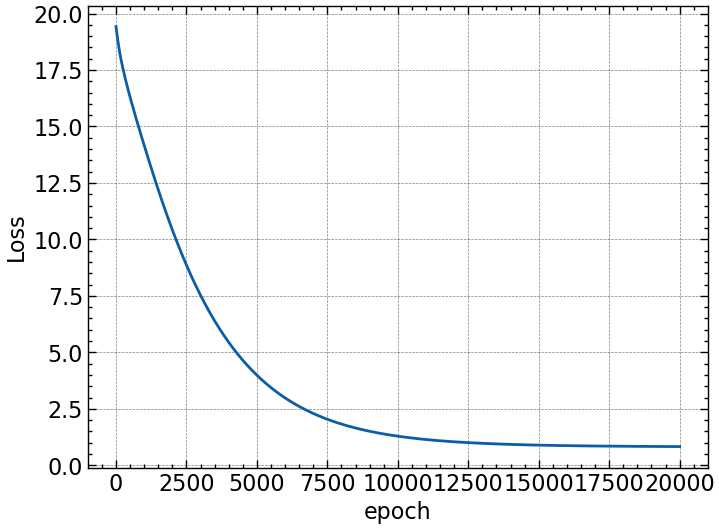

In [24]:
plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.show()

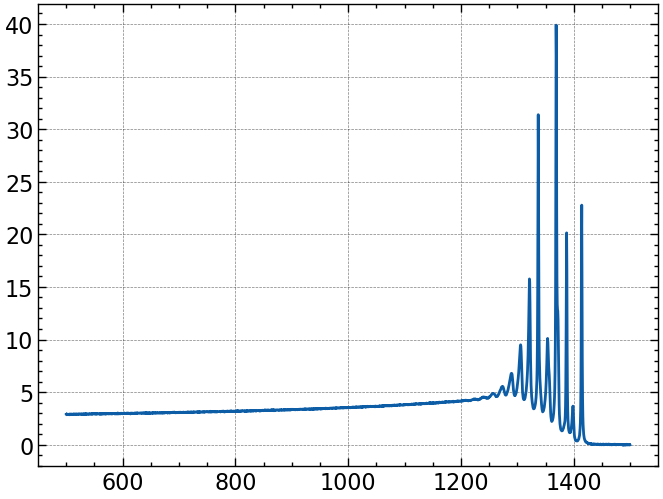

In [25]:
plt.plot(energy,f(x)[3].detach().numpy())

In [26]:
f

MyNeuralNet(
  (Matrix1): Linear(in_features=1, out_features=2048, bias=True)
  (Matrix2): Linear(in_features=2048, out_features=2048, bias=True)
  (Matrix3): Linear(in_features=2048, out_features=2048, bias=True)
  (Matrix4): Linear(in_features=2048, out_features=2048, bias=True)
  (R): ReLU()
  (E): Tanh()
)

In [27]:
torch.save(f, 'back lite.pt')

In [28]:
#r = torch.load('tensor.pt')

In [29]:
#r(x)

In [30]:
#plt.plot(r(x)[3].detach().numpy())

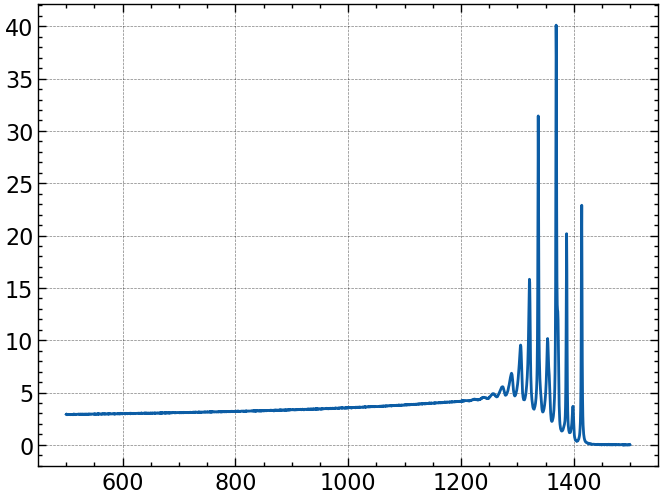

In [31]:
plt.plot(energy,f(2*x)[-1].detach().numpy())

In [32]:
losses[-1]

0.8294267058372498